In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load Dataset
df = pd.read_csv("/content/Train_Data.csv")
df.head()


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
df.drop('SEQN',axis=1,inplace=True)

In [ ]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types and nulls
df.info()

# Summary statistics
df.describe()


Dataset Shape: (1966, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RIAGENDR   1948 non-null   float64
 1   PAQ605     1953 non-null   float64
 2   BMXBMI     1948 non-null   float64
 3   LBXGLU     1953 non-null   float64
 4   DIQ010     1948 non-null   float64
 5   LBXGLT     1955 non-null   float64
 6   LBXIN      1957 non-null   float64
 7   age_group  1952 non-null   object 
dtypes: float64(7), object(1)
memory usage: 123.0+ KB


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [ ]:
# Count of missing values
df.isnull().sum()

,0
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
# Fill missing values
num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop any rows with missing target
df.dropna(subset=['age_group'], inplace=True)

# Confirm cleanup
df.isnull().sum()


/tmp/ipython-input-122-3254331816.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-122-3254331816.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


In [ ]:
# Convert age_group to numeric (Adult: 0, Senior: 1)
# Use map to convert string categories to integers
df['age_group'] = df['age_group'].map({'Adult': 0, 'Senior': 1})
# Now convert the mapped column to integer type
df['age_group'] = df['age_group'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RIAGENDR   1952 non-null   float64
 1   PAQ605     1952 non-null   float64
 2   BMXBMI     1952 non-null   float64
 3   LBXGLU     1952 non-null   float64
 4   DIQ010     1952 non-null   float64
 5   LBXGLT     1952 non-null   float64
 6   LBXIN      1952 non-null   float64
 7   age_group  1952 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 137.2 KB


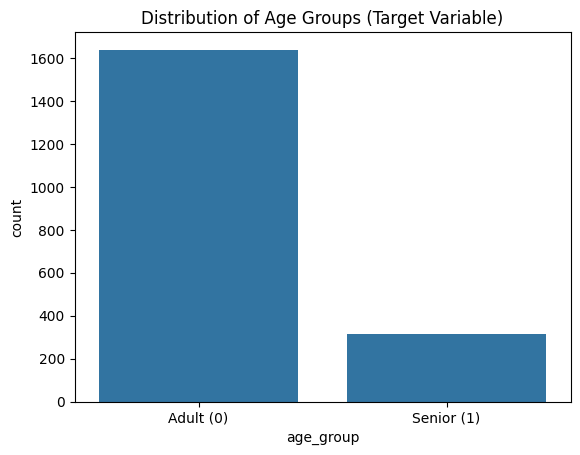

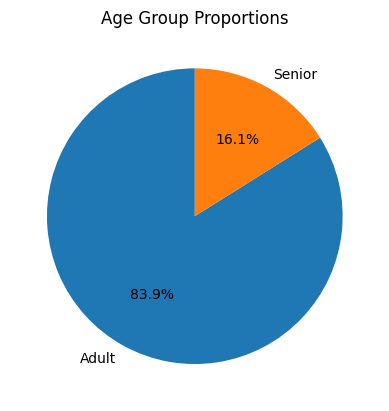

In [ ]:
# Target variable distribution
sns.countplot(data=df, x='age_group')
plt.title("Distribution of Age Groups (Target Variable)")
plt.xticks([0, 1], ["Adult (0)", "Senior (1)"])
plt.show()

# Display class proportions
df['age_group'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90, labels=['Adult', 'Senior'])
plt.title("Age Group Proportions")
plt.ylabel("")
plt.show()


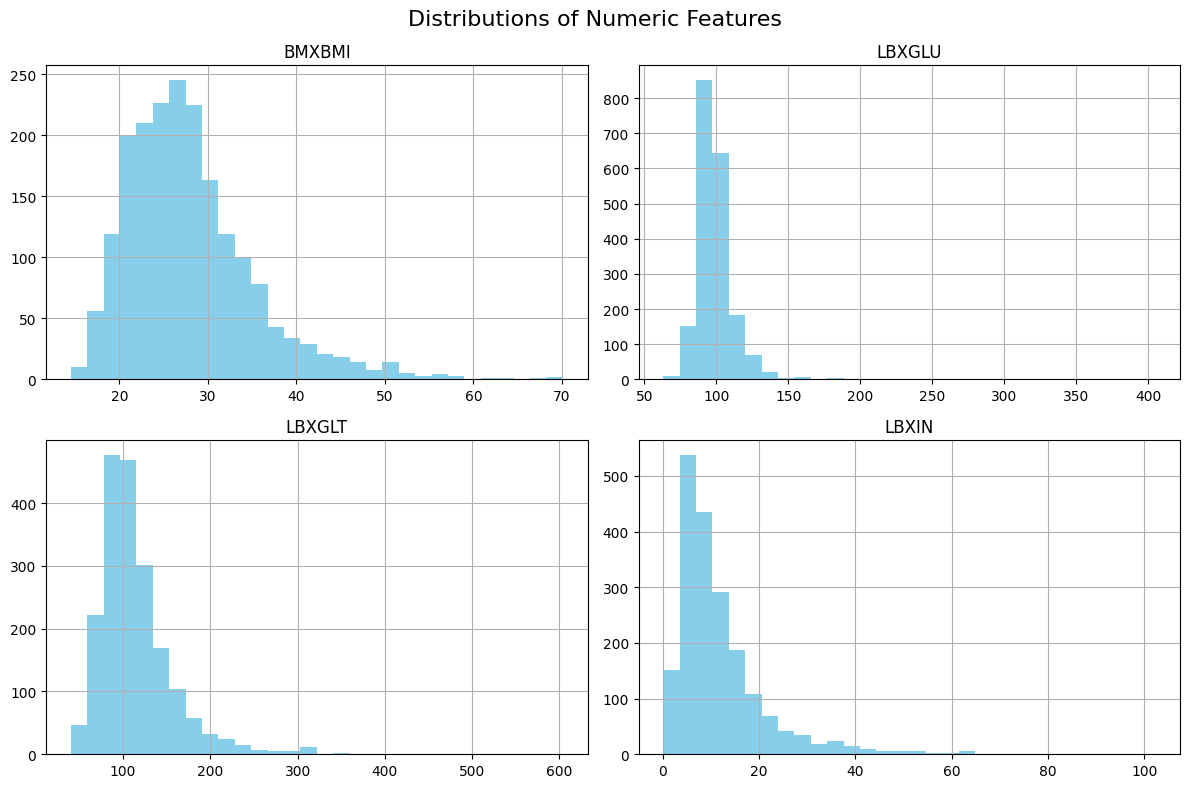

In [ ]:
# Plot histograms for numeric columns
num_features = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

df[num_features].hist(bins=30, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


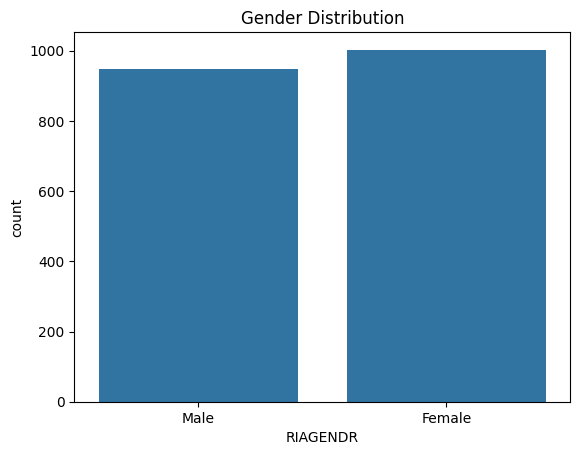

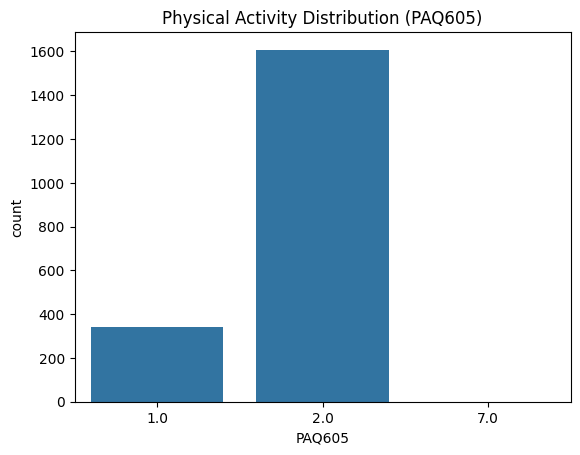

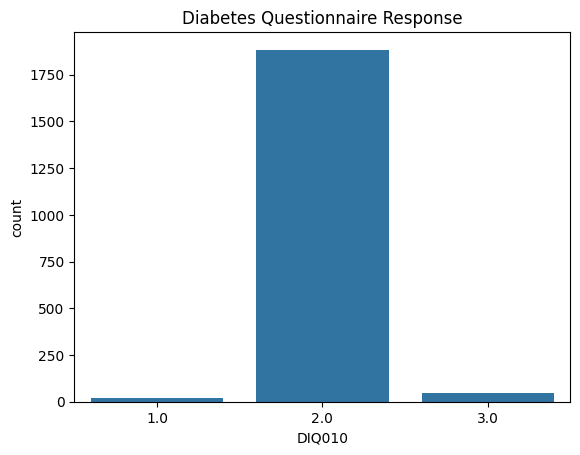

In [ ]:
# Gender
sns.countplot(data=df, x='RIAGENDR')
plt.title("Gender Distribution")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# PAQ605 - Physical activity
sns.countplot(data=df, x='PAQ605')
plt.title("Physical Activity Distribution (PAQ605)")
plt.show()

# Diabetes Indicator
sns.countplot(data=df, x='DIQ010')
plt.title("Diabetes Questionnaire Response")
plt.show()


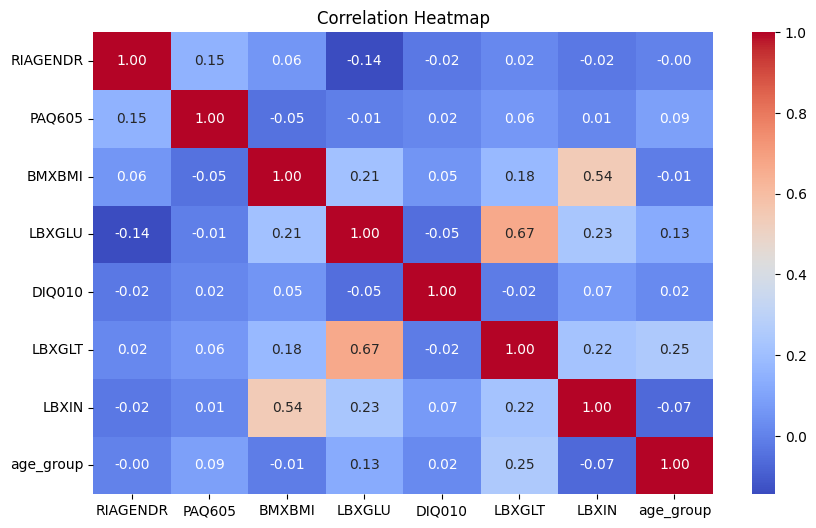

In [ ]:
# Correlation matrix (with target)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


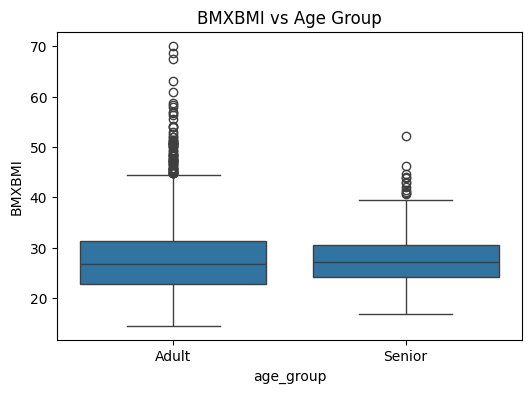

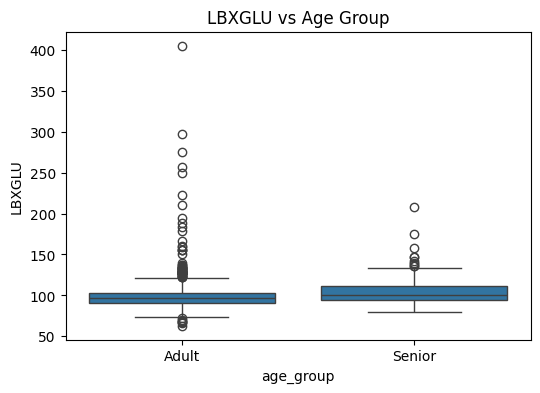

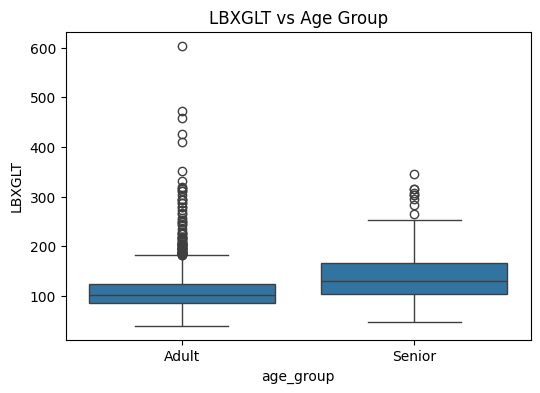

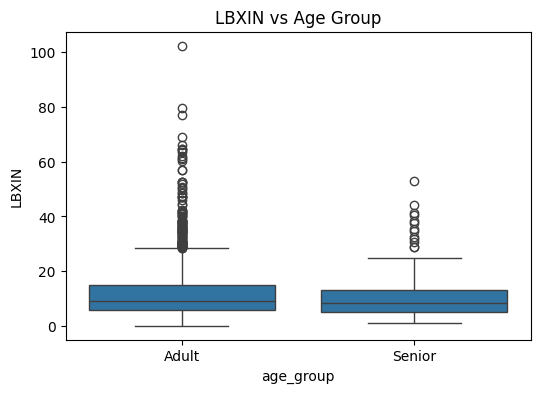

In [ ]:
# Boxplots
features = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='age_group', y=col, data=df)
    plt.title(f"{col} vs Age Group")
    plt.xticks([0, 1], ['Adult', 'Senior'])
    plt.show()


In [ ]:
# Cap outliers at 1st and 99th percentile
def cap_outliers(df, col):
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q_low, q_high)

for col in ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
    cap_outliers(df, col)


In [ ]:
df = pd.get_dummies(df, columns=['PAQ605','DIQ010','RIAGENDR'], drop_first=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BMXBMI        1952 non-null   float64
 1   LBXGLU        1952 non-null   float64
 2   LBXGLT        1952 non-null   float64
 3   LBXIN         1952 non-null   float64
 4   age_group     1952 non-null   int64  
 5   PAQ605_2.0    1952 non-null   bool   
 6   PAQ605_7.0    1952 non-null   bool   
 7   DIQ010_2.0    1952 non-null   bool   
 8   DIQ010_3.0    1952 non-null   bool   
 9   RIAGENDR_2.0  1952 non-null   bool   
dtypes: bool(5), float64(4), int64(1)
memory usage: 101.0 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only continuous variables that need scaling
scale_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BMXBMI        1952 non-null   float64
 1   LBXGLU        1952 non-null   float64
 2   LBXGLT        1952 non-null   float64
 3   LBXIN         1952 non-null   float64
 4   age_group     1952 non-null   int64  
 5   PAQ605_2.0    1952 non-null   bool   
 6   PAQ605_7.0    1952 non-null   bool   
 7   DIQ010_2.0    1952 non-null   bool   
 8   DIQ010_3.0    1952 non-null   bool   
 9   RIAGENDR_2.0  1952 non-null   bool   
dtypes: bool(5), float64(4), int64(1)
memory usage: 101.0 KB


In [ ]:
from sklearn.model_selection import train_test_split

# Drop identifier column if present
if 'SEQN' in df.columns:
    df.drop(columns=['SEQN'], inplace=True)

# Separate target and features
X = df.drop(columns=['age_group'])
y = df['age_group']

# Split the data (stratify preserves class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42, stratify=y
)

from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check class balance after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_bal).value_counts())



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79       328
           1       0.25      0.51      0.34        63

    accuracy                           0.68       391
   macro avg       0.57      0.61      0.56       391
weighted avg       0.78      0.68      0.71       391

Confusion Matrix:
 [[232  96]
 [ 31  32]]
ROC AUC Score: 0.6795392953929539


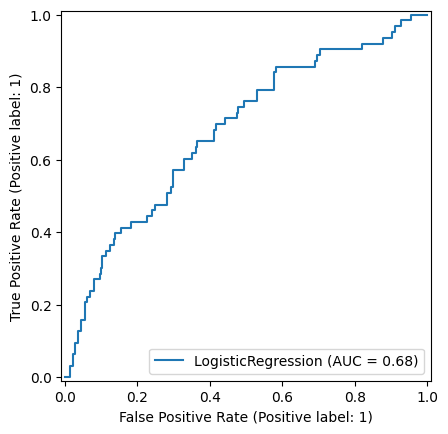

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Create model with class weights (helps even without SMOTE)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_bal, y_train_bal)

dt_pred = dt_model.predict(X_test)
dt_proba = dt_model.predict_proba(X_test)[:, 1]

print("=== Decision Tree ===")
print(classification_report(y_test, dt_pred))
print("ROC AUC:", roc_auc_score(y_test, dt_proba))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       328
           1       0.21      0.38      0.27        63

    accuracy                           0.67       391
   macro avg       0.54      0.55      0.53       391
weighted avg       0.76      0.67      0.71       391

ROC AUC: 0.5548054587688734


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_bal, y_train_bal)

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       328
           1       0.28      0.33      0.30        63

    accuracy                           0.75       391
   macro avg       0.57      0.58      0.58       391
weighted avg       0.77      0.75      0.76       391

ROC AUC: 0.6494628339140534


In [ ]:
! pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)

xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("=== XGBoost ===")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       328
           1       0.27      0.33      0.30        63

    accuracy                           0.74       391
   macro avg       0.57      0.58      0.57       391
weighted avg       0.77      0.74      0.76       391

ROC AUC: 0.6428571428571429


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=250, random_state=42)
mlp_model.fit(X_train_bal, y_train_bal)

mlp_pred = mlp_model.predict(X_test)
mlp_proba = mlp_model.predict_proba(X_test)[:, 1]

print("=== MLP Classifier ===")
print(classification_report(y_test, mlp_pred))
print("ROC AUC:", roc_auc_score(y_test, mlp_proba))


=== MLP Classifier ===
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       328
           1       0.21      0.27      0.24        63

    accuracy                           0.72       391
   macro avg       0.53      0.54      0.53       391
weighted avg       0.75      0.72      0.73       391

ROC AUC: 0.6025454897406117


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
! pip install catboost
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_bal, y_train_bal)

cat_pred = cat_model.predict(X_test)
cat_proba = cat_model.predict_proba(X_test)[:, 1]

print("=== CatBoost ===")
print(classification_report(y_test, cat_pred))
print("ROC AUC:", roc_auc_score(y_test, cat_proba))


=== CatBoost ===
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        82
           1       0.24      0.44      0.31        16

    accuracy                           0.68        98
   macro avg       0.56      0.58      0.55        98
weighted avg       0.77      0.68      0.72        98

ROC AUC: 0.611280487804878


In [ ]:
from lightgbm import LGBMClassifier




# Separate target and features
X = df.drop(columns=['age_group'])
y = df['age_group']



from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X, y)

# Check class balance after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_bal).value_counts())



lgb_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgb_model.fit(X_train_bal, y_train_bal)

# lgb_pred = lgb_model.predict(X_test)
# lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

# print("=== LightGBM ===")
# print(classification_report(y_test, lgb_pred))
# print("ROC AUC:", roc_auc_score(y_test, lgb_proba))


Class distribution after SMOTE:
 age_group
0    1638
1    1638
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 1638, number of negative: 1638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Load test data
test_df = pd.read_csv('/content/Test_Data.csv')

# Drop SEQN if present
if 'SEQN' in test_df.columns:
    test_df.drop(columns=['SEQN'], inplace=True)

# Fill missing values using modes/medians from the TRAINING data
# Ensure columns exist before filling NaNs
for col in num_cols:
    if col in test_df.columns and col in df.columns: # Also check if col exists in df (training data)
        test_df[col].fillna(df[col].median(), inplace=True)  # use training median
    elif col not in test_df.columns:
        print(f"Warning: Numeric column '{col}' not found in test data.")
    else:
         print(f"Warning: Numeric column '{col}' not found in training data for filling test data.")


for col in cat_cols:
    if col in test_df.columns and col in df.columns: # Also check if col exists in df (training data)
        # Make sure there are non-NaN values to calculate mode
        if not df[col].mode().empty:
             test_df[col].fillna(df[col].mode()[0], inplace=True)  # use training mode
        else:
            print(f"Warning: Cannot calculate mode for '{col}' in training data. Column skipped for fillna.")
    elif col not in test_df.columns:
        print(f"Warning: Categorical column '{col}' not found in test data.")
    else:
         print(f"Warning: Categorical column '{col}' not found in training data for filling test data.")




test_df = pd.get_dummies(test_df, columns=['PAQ605','DIQ010','RIAGENDR'], drop_first=True)






# Scale numeric features using the *training* scaler
# Ensure columns exist before scaling
scale_cols_test = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
cols_to_scale_present = [col for col in scale_cols_test if col in test_df.columns]

# Check if the scaler exists (it was created in a previous cell)
if 'scaler' in globals() and isinstance(scaler, StandardScaler):
    if cols_to_scale_present:
        test_df[cols_to_scale_present] = scaler.transform(test_df[cols_to_scale_present]) # Use transform, not fit_transform
    else:
        print("Warning: No numeric columns found in test data for scaling.")
else:
    print("Error: StandardScaler 'scaler' not found or not initialized.")


# Match training columns - Add missing columns and reorder
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with default value 0

# Ensure all columns from X_train are in test_df before reordering
# This handles potential issues if a column is missing in test_df entirely
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)


# Now test_df has the same columns in the same order as X_train

/tmp/ipython-input-131-1694609097.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(df[col].median(), inplace=True)  # use training median


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BMXBMI        312 non-null    float64
 1   LBXGLU        312 non-null    float64
 2   LBXGLT        312 non-null    float64
 3   LBXIN         312 non-null    float64
 4   PAQ605_2.0    312 non-null    bool   
 5   PAQ605_7.0    312 non-null    int64  
 6   DIQ010_2.0    312 non-null    bool   
 7   DIQ010_3.0    312 non-null    bool   
 8   RIAGENDR_2.0  312 non-null    bool   
dtypes: bool(4), float64(4), int64(1)
memory usage: 13.5 KB


In [ ]:
# Predict
test_pred = lgb_model.predict(test_df)

# Ensure values are int (0 or 1)
test_pred = test_pred.astype(int)


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({'age_group': test_pred})

# Save to CSV
submission.to_csv('submission.csv', index=False)
